# Ultrasonic TOF (Time of Flight)

Create an ultasonic pulse of frequency f_PLS = 40MHz with 10 clock periods.
The audio stream is sampled at f_PCM = 300kHz.

PDM microphone at f_PDM = 4.8MHz.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


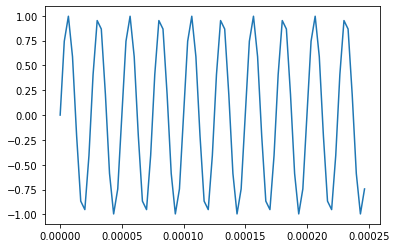

In [2]:
import numpy as np
import matplotlib.pylab as plt

# pulse frequency (40kHz)
f_PLS = 40000
# number of pulse periods
N_PLS = 10
# time of pulse
T_PLS = 1/f_PLS * N_PLS

# sampling frequency for PDM (4.8MHz for ultrasonic mode)
f_PDM = 4800000
# oversample rate
OSR = 16
# sampling frequency for PCM
f_PCM = f_PDM / OSR
T_PCM = 1 / f_PCM

# simulation time
T_SIM = T_PLS

t_pcm = np.arange(0, T_SIM, T_PCM, dtype=float)
y_pcm = np.sin(2*np.pi*f_PLS*t_pcm)
plt.plot(t_pcm, y_pcm)
#plt.xlabel('time[]')
#plt.ylabel('sin(x)')
plt.show()

In [3]:
from deltasigma import *

OSR = 16
order = 5
H = synthesizeNTF(order, OSR, 1)

/usr/lib/python3/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /home/ijeras/.local/lib/python3.10/site-packages/deltasigma/_simulateDSM_cblas.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
/usr/lib/python3/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /home/ijeras/.local/lib/python3.10/site-packages/deltasigma/_simulateDSM_scipy_blas.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)


In [4]:
[y_pdm, xn, xmax, y] = simulateDSM(y_pcm, H)

/home/ijeras/.local/lib/python3.10/site-packages/deltasigma/_simulateDSM.py:214: UserWarning: Using a slow implementation of simulateDSM
Refer to the docs for how to switch to a fast one
  warn('Using a slow implementation of simulateDSM\n' +


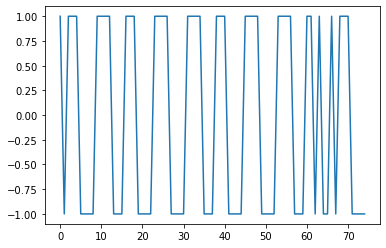

In [5]:
x_pdm = np.arange(y_pdm.size)
plt.plot(x_pdm, y_pdm)
plt.show()

In [6]:
print(y_pcm.size, y_pdm.size)

75 75


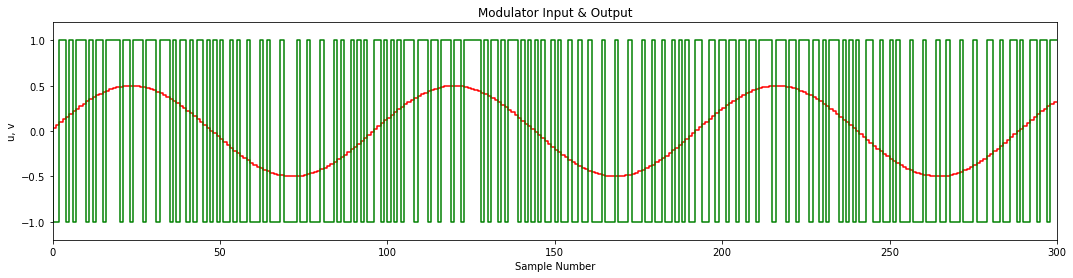

In [7]:
figure(figsize=(18, 4))
# number of samples
N = 8192

fB = int(np.ceil(N/(2.*OSR)))
ftest = np.floor(1./3.*fB)
u = 0.5*np.sin(2*np.pi*ftest/N*np.arange(N))
v, xn, xmax, y = simulateDSM(u, H)
t = np.arange(301)
step(t, u[t],'r')
#hold(True)
step(t, v[t], 'g')
axis([0, 300, -1.2, 1.2])
xlabel('Sample Number')
ylabel('u, v')
title('Modulator Input & Output');

In [8]:
type(N//2)

int

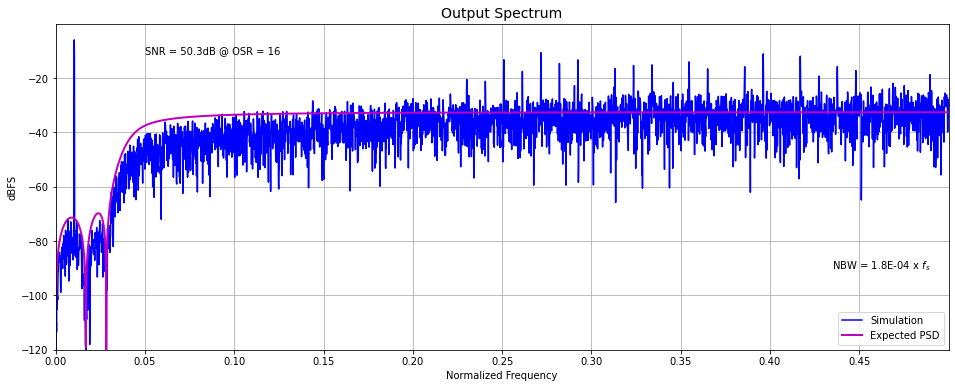

In [9]:
f = np.linspace(0, 0.5, N//2 + 1)
spec = np.fft.fft(v * ds_hann(N))/(N/4)
plot(f, dbv(spec[:N//2 + 1]),'b', label='Simulation')
figureMagic([0, 0.5], 0.05, None, [-120, 0], 20, None, (16, 6), 'Output Spectrum')
xlabel('Normalized Frequency')
ylabel('dBFS')
snr = calculateSNR(spec[2:fB+1], ftest - 2)
text(0.05, -10, 'SNR = %4.1fdB @ OSR = %d' % (snr, OSR), verticalalignment='center')
NBW = 1.5/N
Sqq = 4*evalTF(H, np.exp(2j*np.pi*f)) ** 2/3.
#hold(True)
plot(f, dbp(Sqq * NBW), 'm', linewidth=2, label='Expected PSD')
text(0.49, -90, 'NBW = %4.1E x $f_s$' % NBW, horizontalalignment='right')
legend(loc=4);